In [10]:
# Import necessary libraries
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Suppress any unnecessary warnings for a clean output
warnings.filterwarnings('ignore')

# 1. Data Loading and Initial Exploration

In [14]:
# Load the LinkedIn data into a dataframe
df = pd.read_csv(r"C:\Users\sneha\Downloads\Basic_LinkedInDataExport_10-18-2023\Connections.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     988 non-null    object
 1   Last Name      988 non-null    object
 2   URL            988 non-null    object
 3   Email Address  17 non-null     object
 4   Company        833 non-null    object
 5   Position       833 non-null    object
 6   Connected On   1015 non-null   object
dtypes: object(7)
memory usage: 55.6+ KB


In [15]:
# Create a full name column by combining first and last names 
df['Full_name'] = df['First Name'] + ' ' + df['Last Name']

In [16]:
df.columns

Index(['First Name', 'Last Name', 'URL', 'Email Address', 'Company',
       'Position', 'Connected On', 'Full_name'],
      dtype='object')

In [ ]:
# Remove duplicate entries based on Full Name and URL
df = df.drop_duplicates(subset=['Full_name', 'URL'])

In [17]:
# Remove columns that aren't necessary for analysis
df.drop(columns=['URL','Email Address','First Name','Last Name' ], inplace=True)

In [18]:
df.head()

,Company,Position,Connected On,Full_name
0,Cognizant Services Ltd,Data Analyst,17-Oct-23,Poorna Chander
1,Photofast Ltd,Front Desk Receptionist,16-Oct-23,Dharma Bandreddi
2,StaffingALL Inc,Chief Executive Officer,14-Oct-23,Swami (Always Hiring)
3,Microsoft,Software Engineer,14-Oct-23,Pavan Kumar Surpaneni
4,RBC,"Senior Recruiter, Tech & Digital, RBC Amplify ...",13-Oct-23,Erin Ciccone


In [19]:
# Check the frequency of each position in the dataset
df['Position'].value_counts()

Software Engineer                    43
Data Engineer                        21
Data Analyst                         19
Associate Software Engineer          19
Software Developer                   19
                                     ..
Campus Program Manager                1
Junior Full Stack Developer           1
Python Backend Developer              1
Research And Development Engineer     1
Professional 1 Product Test           1
Name: Position, Length: 509, dtype: int64

# 2. Data Cleaning

In [20]:
# Remove the special characters 
df['Position'] = df['Position'].str.replace(r'[^a-zA-Z0-9\s]', "", regex=True)
#df['Position'] = np.where(df['Position'].str.contains(r'[^a-zA-Z0-9\s]', regex=True), np.nan, df['Position'])


In [21]:
# Check the missing values in each column
df.isna().sum()

Company         182
Position        182
Connected On      0
Full_name        27
dtype: int64

In [22]:
# Drop rows with null values
df.dropna(inplace=True)

In [24]:
# Convert the "connected on" column to datetime format
df['Connected On'] = pd.to_datetime(df['Connected On'], format='%d-%b-%y')

In [26]:
df["Connected On"].head()

0   2023-10-17
1   2023-10-16
2   2023-10-14
3   2023-10-14
4   2023-10-13
Name: Connected On, dtype: datetime64[ns]

# 3. Categorizing Positions

In [27]:
# Mapping conditions to the broader categories
conditions = [
    df['Position'].str.contains('Software|Developer|SDE|Programmer|DevOps|Full Stack|Frontend|Backend|UI|Android|iOS|IT|SDM|development|project|Associate|system|Information', case=False),
    df['Position'].str.contains('Data|Analyst|Analytics|Machine Learning|AI|Big Data', case=False),
    df['Position'].str.contains('Engineer|Eng|Designer|Design|Architect', case=False),
    df['Position'].str.contains('Intern|Trainee|Student|Graduate|Fellow|Ambassador|member', case=False),
    df['Position'].str.contains('Professor|Tutor|Instructor|Teacher|Research Assistant|Teaching Assistant|learning specialist|Grader', case=False),
    df['Position'].str.contains('Manager|Lead|Director|Head|Chief|CEO|COO|Founder|Chair|Executive|Coordinator', case=False),
    df['Position'].str.contains('Consultant|Analyst|Business|Strategist|Advisor', case=False),
    df['Position'].str.contains('Support|Customer Service|Helpdesk|IT Support', case=False),
    df['Position'].str.contains('Recruiter|Talent Acquisition|HR|Human Resources', case=False),
]

# Corresponding titles for the conditions
titles = [
    'Software Development',
    'Data Roles',
    'Engineering',
    'Interns and Students',
    'Teaching and Academic',
    'Management and Leadership',
    'Consulting and Business Analysis',
    'Support and Customer Service',
    'Recruitment and HR',
]

# Create a new column 'Title' and set it based on the conditions
df['Title'] = pd.np.select(conditions, titles, default='Others')

In [28]:
df['Title'].value_counts()

Software Development                431
Data Roles                          159
Interns and Students                 74
Management and Leadership            43
Engineering                          42
Others                               32
Teaching and Academic                29
Consulting and Business Analysis     19
Support and Customer Service          4
Name: Title, dtype: int64

In [ ]:
#df[df['Title'] == 'Others'][['Position', 'Title']].to_csv("checking.csv")

In [29]:
df.head()

,Company,Position,Connected On,Full_name,Title
0,Cognizant Services Ltd,Data Analyst,2023-10-17,Poorna Chander,Data Roles
1,Photofast Ltd,Front Desk Receptionist,2023-10-16,Dharma Bandreddi,Others
2,StaffingALL Inc,Chief Executive Officer,2023-10-14,Swami (Always Hiring),Management and Leadership
3,Microsoft,Software Engineer,2023-10-14,Pavan Kumar Surpaneni,Software Development
4,RBC,Senior Recruiter Tech Digital RBC Amplify Pro...,2023-10-13,Erin Ciccone,Software Development


# 4. Feature Engineering

In [31]:
# Derive Connection Duration
df['Connection Duration'] = (pd.Timestamp.now() - df['Connected On']).dt.days

In [34]:
df['Connection Duration'].unique()

array([   2,    3,    5,    6,    8,    9,   12,   13,   14,   15,   20,
         22,   24,   30,   34,   35,   36,   37,   41,   42,   44,   48,
         49,   50,   51,   54,   55,   56,   58,   59,   61,   63,   64,
         66,   69,   72,   73,   75,   77,   79,   80,   83,   84,   85,
         86,   89,   91,   92,   94,   95,   97,  100,  101,  102,  103,
        105,  106,  107,  108,  115,  116,  117,  119,  122,  127,  128,
        130,  131,  132,  133,  134,  142,  143,  146,  147,  148,  151,
        156,  157,  159,  160,  161,  162,  163,  164,  165,  166,  168,
        169,  170,  171,  173,  175,  176,  177,  178,  180,  182,  183,
        184,  185,  187,  188,  189,  191,  193,  194,  196,  197,  198,
        200,  201,  202,  203,  204,  205,  206,  209,  211,  212,  213,
        215,  217,  219,  221,  223,  224,  225,  226,  227,  229,  230,
        231,  232,  233,  234,  236,  237,  238,  239,  240,  242,  243,
        245,  246,  247,  248,  249,  250,  251,  2

# 5. Data Visualization

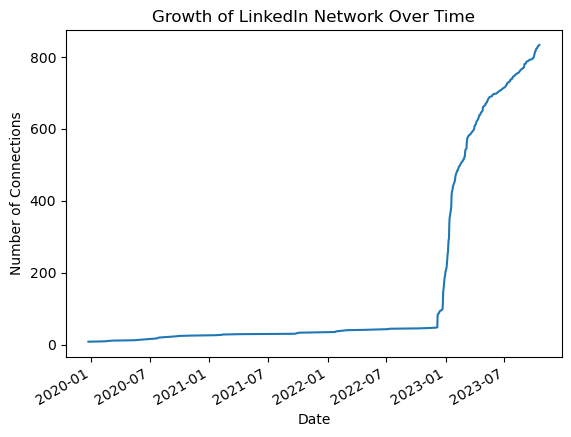

In [35]:
# Growth of LinkedIn Network Over Time
df['Connected On'].value_counts().sort_index().cumsum().plot()
plt.title('Growth of LinkedIn Network Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Connections')
plt.show()


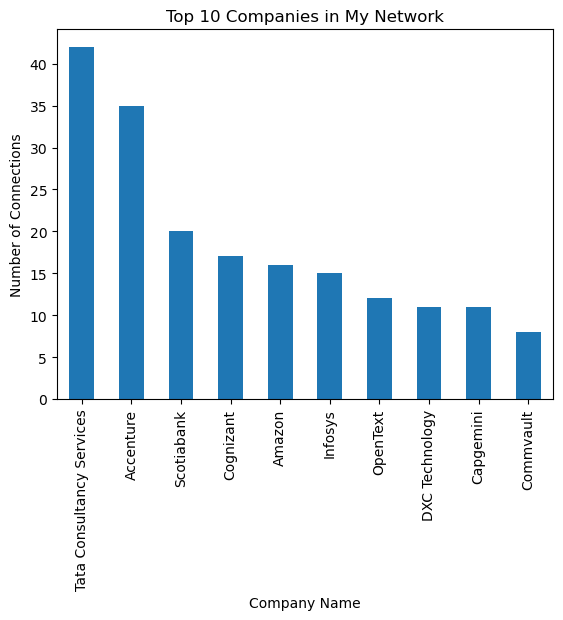

In [36]:
# Top Companies in Network

df['Company'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Companies in My Network')
plt.xlabel('Company Name')
plt.ylabel('Number of Connections')
plt.show()

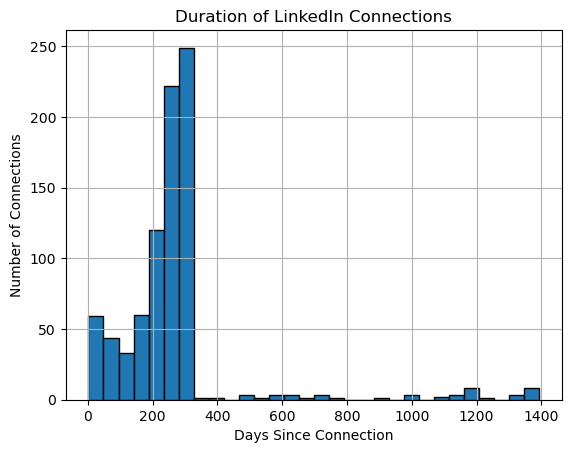

In [37]:
# Duration of Connections
df['Connection Duration'].hist(bins=30, edgecolor='black')
plt.title('Duration of LinkedIn Connections')
plt.xlabel('Days Since Connection')
plt.ylabel('Number of Connections')
plt.show()


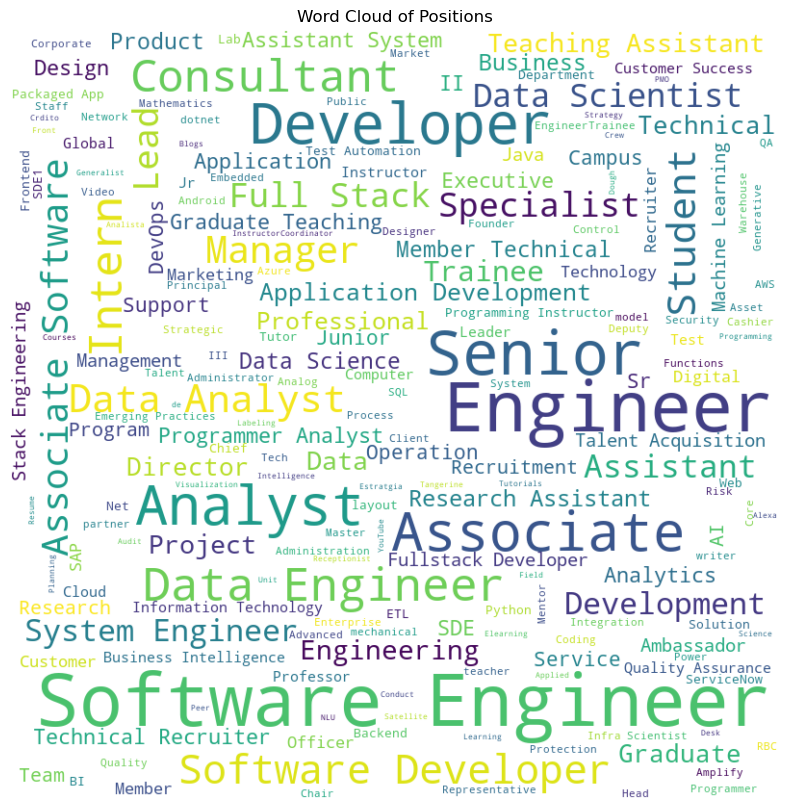

In [39]:
#Word Cloud of Positions
position_text = ' '.join(df['Position'].dropna())
wordcloud = WordCloud(background_color='white', width=800, height=800).generate(position_text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Positions')
plt.axis('off')
plt.show()

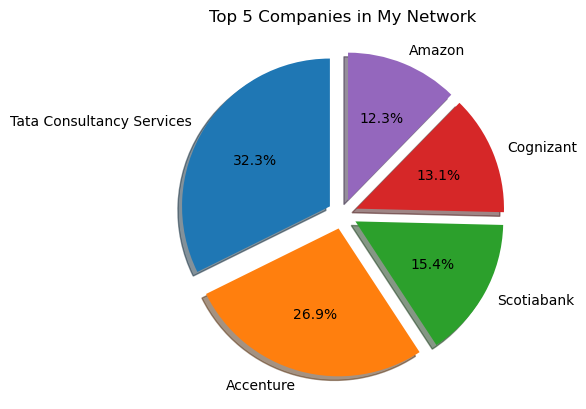

In [41]:
# Pie Chart of Top 5 Companies
df['Company'].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True, explode=[0.1]*5)
plt.title('Top 5 Companies in My Network')
plt.ylabel('')
plt.show()

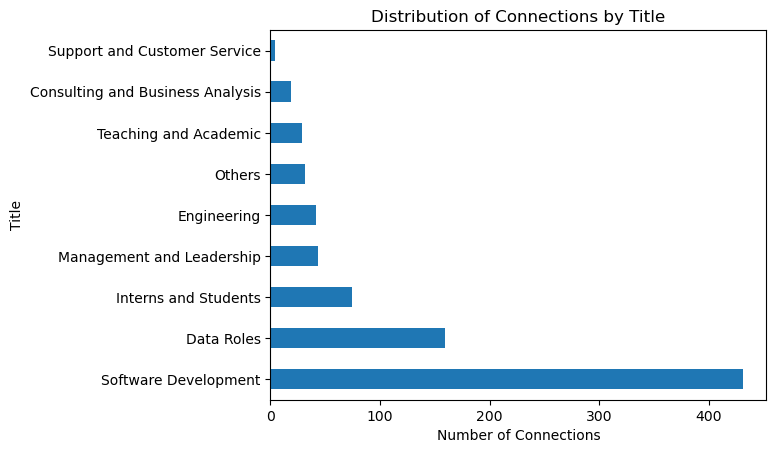

In [42]:
# Distribution of Connections by Title
df['Title'].value_counts().plot(kind='barh')
plt.title('Distribution of Connections by Title')
plt.xlabel('Number of Connections')
plt.ylabel('Title')
plt.show()
